# K Means Algorithm from scratch

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=[iris.feature_names])
X = df.drop(columns=["sepal length (cm)", "sepal width (cm)"], axis=1)
y = pd.DataFrame(iris.target, columns=["Target"])
X_arr, y_arr = np.array(X, dtype=float), np.squeeze(np.array(y, dtype=int))

C:\Users\kaush\AppData\Local\Temp\ipykernel_12684\4119145982.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=["sepal length (cm)", "sepal width (cm)"], axis=1)


## Plotting Data

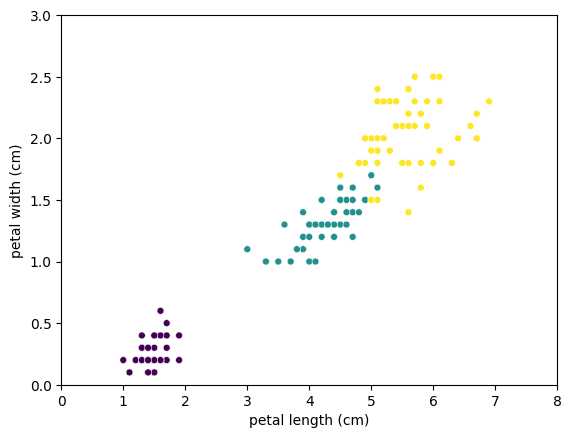

In [4]:
cmap = sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(x=X_arr[:, 0], y=X_arr[:, 1], c=y_arr, s=25, cmap=cmap)
plt.xlabel("petal length (cm)"), plt.ylabel("petal width (cm)")
plt.xlim(0, 8), plt.ylim(0, 3)
plt.show()

## Euclidean Distance

In [5]:
def euclidean(x, y):
    return np.sqrt(np.square(x[:, 0] - y[0]) + np.square(x[:, 1] - y[1]))

## K Means Algorithm

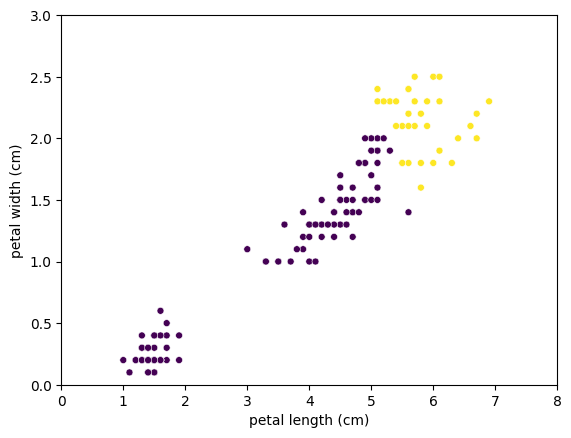

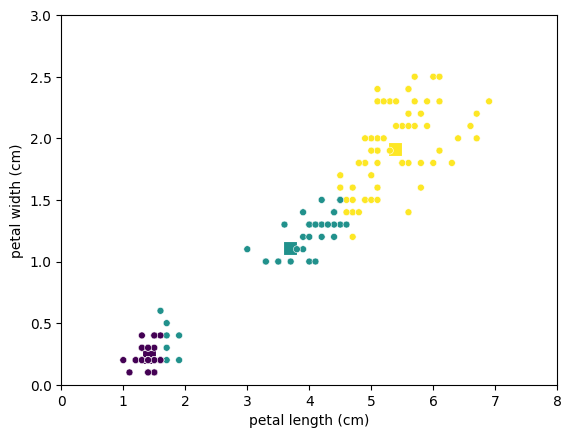

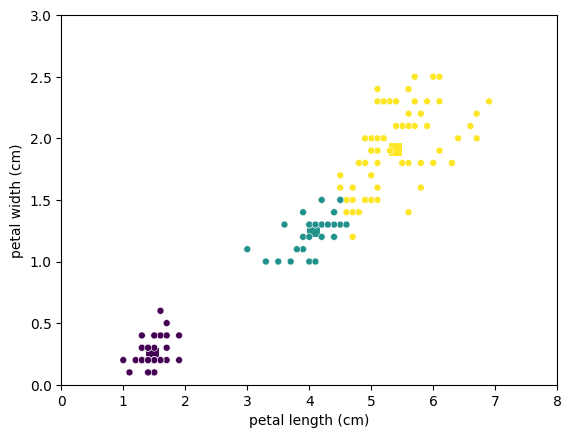

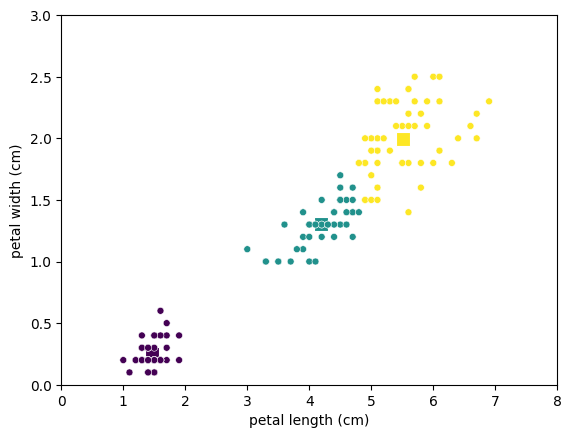

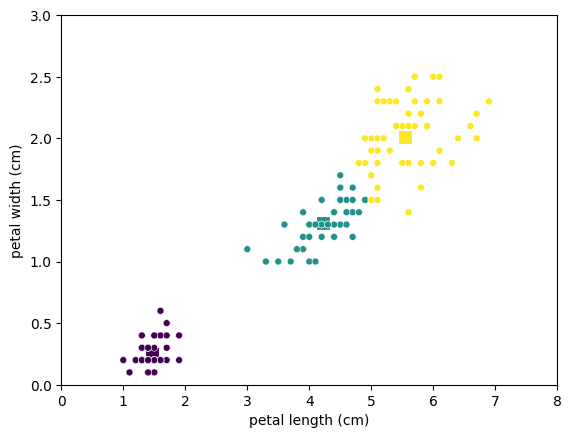

In [16]:
num = 3
n_iters = 5

K = np.array(np.random.uniform(low=max(4, 5), high=min(2, 3), size=(num,2)))
distances = None

for iters in range(n_iters):
    labels = np.array([], dtype=int)

    for values in X_arr:
        distances = euclidean(K, values)
        labels = np.append(labels, np.argmin(distances))

    for index, points in enumerate(K):
        calc = np.squeeze([X_arr[i] for i in np.where(index == labels)])

        if len(np.shape(calc)) == 1:
            calc = np.expand_dims(calc, axis=0)
            print(np.shape(calc))

        calcX, calcY = sum(calc[:, 0]), sum(calc[:, 1]) 
        
        if calcX != 0 and calcY != 0:
            calcX /= len(calc)
            calcY /= len(calc)
        K[index] = np.array([calcX, calcY])

    temp_lst = np.array(list(set(labels)))
    K_temp = np.array([list(K[i]) for i in temp_lst])

    plt.xlim(0, 8), plt.ylim(0, 3)
    if iters > 0:
        sns.scatterplot(x=K_temp[:, 0], y=K_temp[:, 1], c=temp_lst, marker="s", s=100, cmap=cmap)
    sns.scatterplot(x=X_arr[:, 0], y=X_arr[:, 1], c=labels, s=25, cmap=cmap)
    plt.xlabel("petal length (cm)"), plt.ylabel("petal width (cm)")
    plt.show()